# ***Proyecto 1. Microestructure***

### Luis Eduardo Jiménez del Muro - 09/09/2025

---

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.6f' % x)

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['grid.alpha'] = 0.3

# **Distribución del precio**

$$
f(x) = \frac{\lambda^k  x^{k-1}  e^{-\lambda x}}{(k-1)!}
$$

In [2]:
def erlang(x, k, lambda_):
    return (lambda_**k * x**(k-1) * np.exp(-lambda_*x)) / math.factorial(k-1)

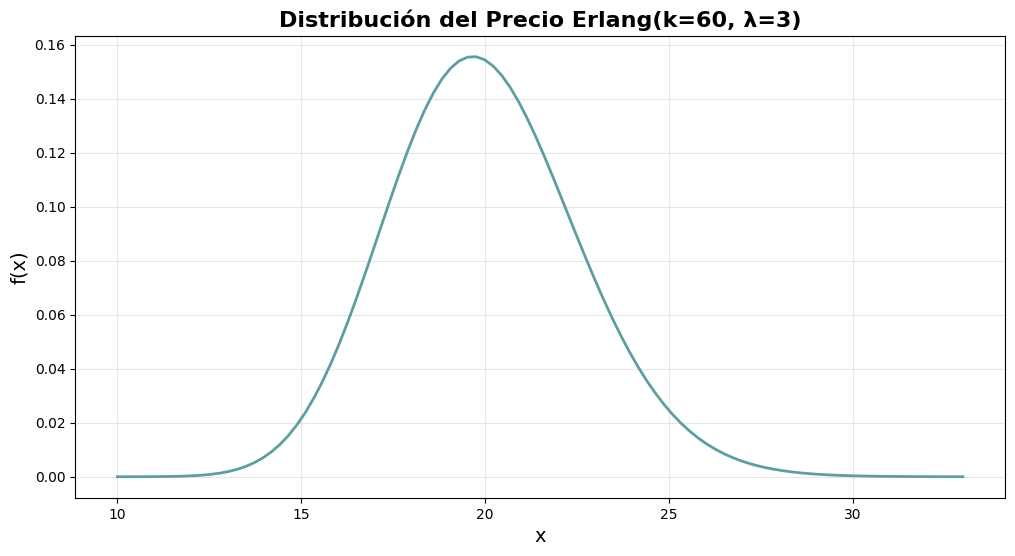

In [3]:
x = np.linspace(10, 33, 100)
y = erlang(x, 60, 3)

plt.figure()
plt.plot(x,y, color='cadetblue', lw=2)
plt.title('Distribución del Precio Erlang(k=60, λ=3)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

# **Gráfica Comparativa**

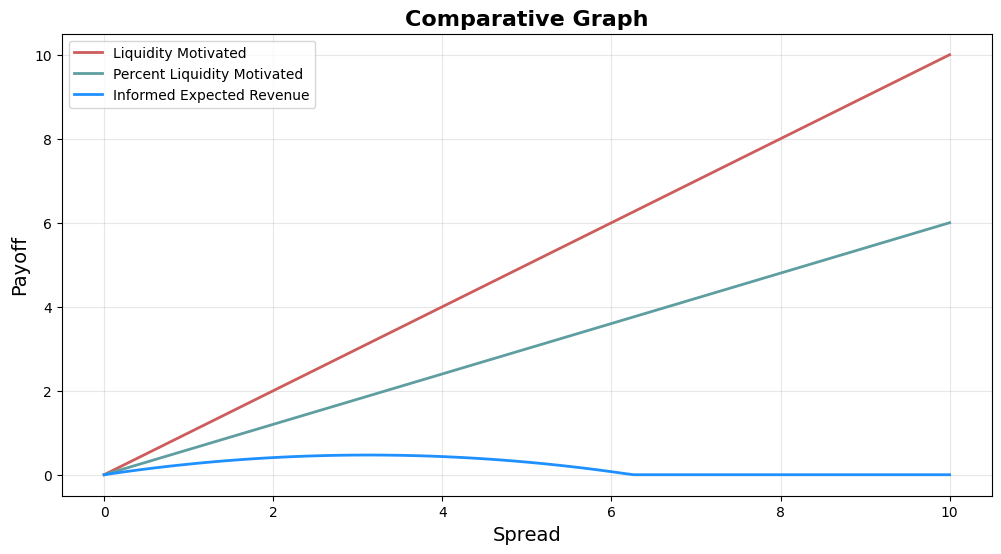

In [4]:
pi = 0.4

spread = np.linspace(0, 10, 100)

def graph_informed(spread):
    return (1-pi)*spread

def pl(spread):
    return 0.5 - 0.08*spread

def curve(spread):
    return np.maximum((pl(spread) * (1-pi) * spread), 0)

plt.figure()
plt.plot(spread, spread, color='indianred', label='Liquidity Motivated', lw=2)
plt.plot(spread, graph_informed(spread), color='cadetblue', label='Percent Liquidity Motivated', lw=2)
plt.plot(spread, curve(spread), color='dodgerblue', label='Informed Expected Revenue', lw=2)
plt.title('Comparative Graph')
plt.xlabel('Spread')
plt.ylabel('Payoff')
plt.legend()
plt.grid()
plt.show()